<a href="https://colab.research.google.com/github/vikranthpulamathi/gw-odw25/blob/main/GW_ODW2025_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

In [2]:
! pip install -q 'lalsuite==7.25' 'PyCBC==2.4.1' gwpy

Sampling rate: 4096.0 Hz Hz
Duration: 128.0 s s


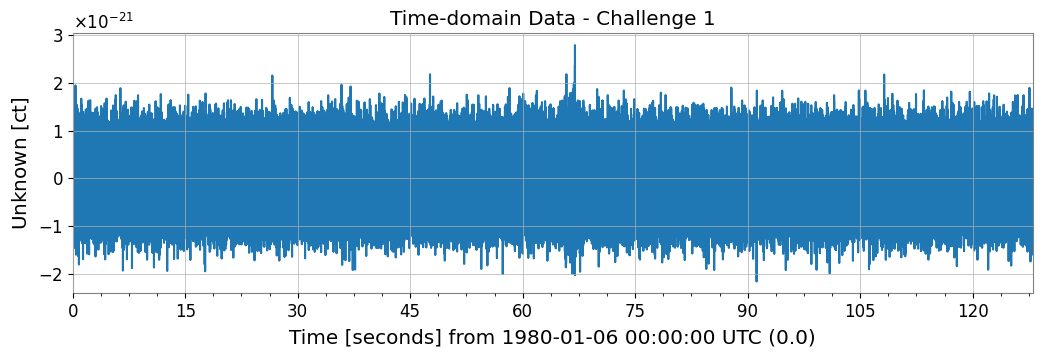

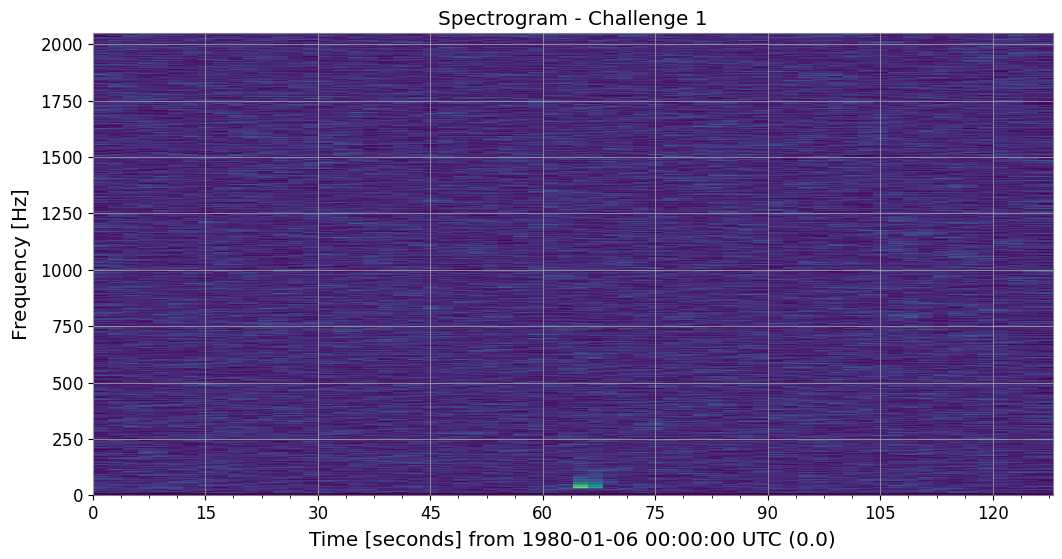

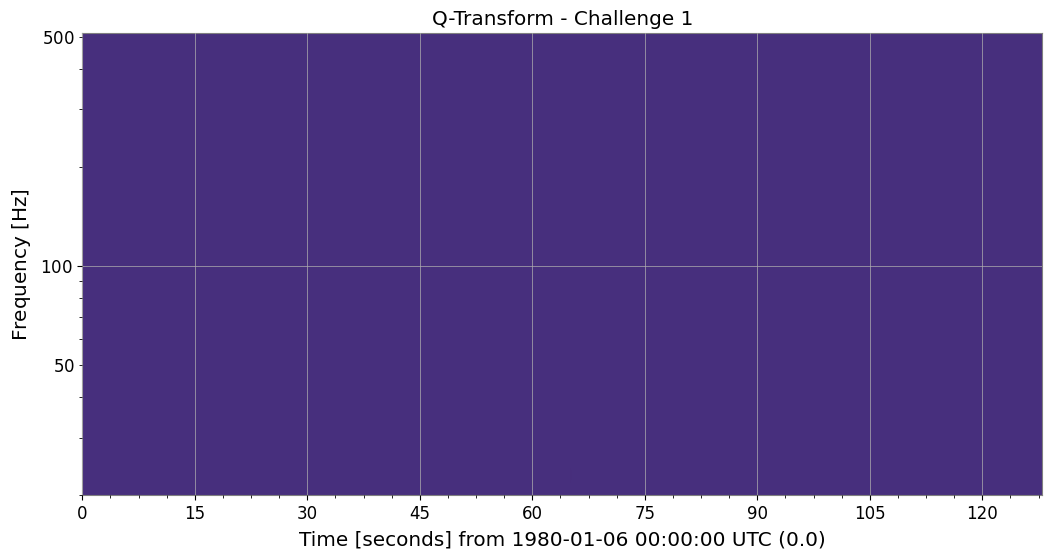

In [3]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from pycbc.filter import matched_filter
from pycbc.psd import interpolate, inverse_spectrum_truncation
import pycbc.waveform
import numpy as np
import lal

# Load data
data = TimeSeries.read("/content/drive/MyDrive/Personal Files/Project/GW-ODW2025/challenge1.gwf", channel="H1:CHALLENGE1")
print(f"Sampling rate: {data.sample_rate} Hz")
print(f"Duration: {data.duration} s")

# Time-domain plot
data.plot()
plt.title("Time-domain Data - Challenge 1")
plt.show()

# Spectrogram
spec = data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
splot = spec.plot()
plt.title("Spectrogram - Challenge 1")
plt.show()

# Q-transform
q = data.q_transform()
plot = q.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(20, 512)
ax.set_title("Q-Transform - Challenge 1")
plt.show()

Sampling rate: 4096.0 Hz Hz
Duration: 128.0 s s
Estimated merger time: 6.2720 s
Peak frequency at merger: 212.50 Hz


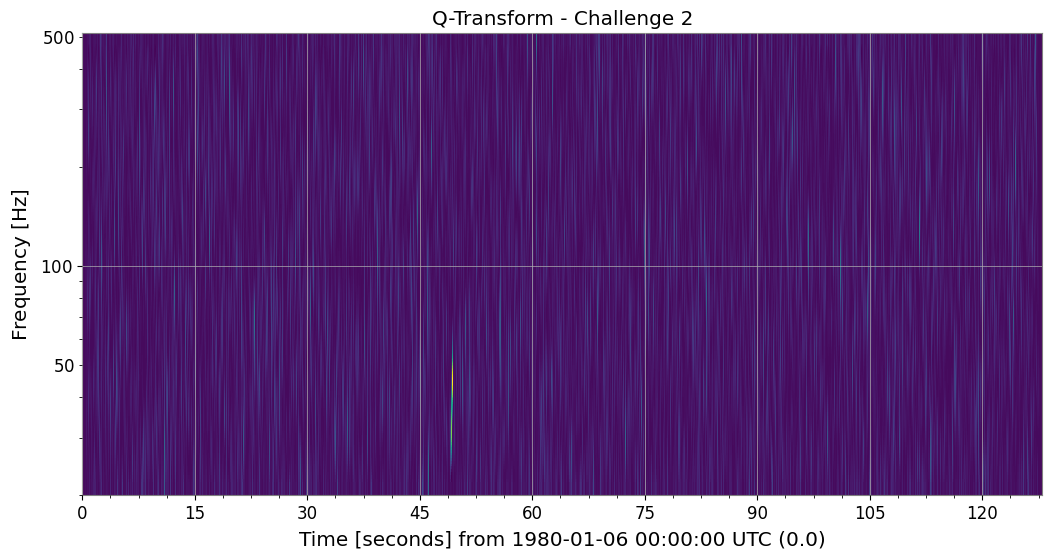

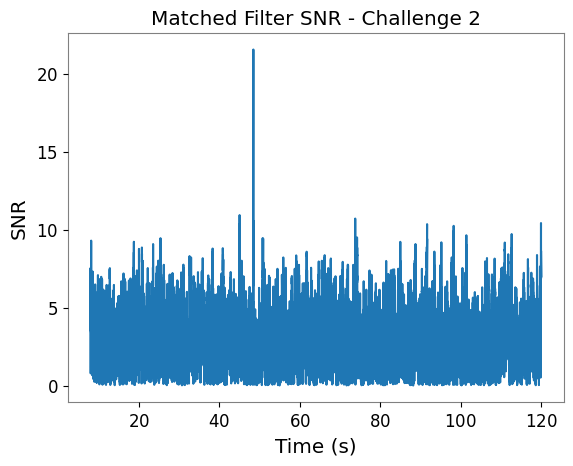

Matched filter peak SNR: 21.54
Time of peak SNR: 48.5186 s


In [5]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = TimeSeries.read("/content/drive/MyDrive/Personal Files/Project/GW-ODW2025/challenge2.gwf", channel="H1:CHALLENGE2")
print(f"Sampling rate: {data.sample_rate} Hz")
print(f"Duration: {data.duration} s")

# Q-transform
q = data.q_transform(outseg=(data.times.value[0], data.times.value[-1]),
                     frange=(20, 512), qrange=(5, 100))

# Find peak power and its index
q_data = q.value  # This is a 2D numpy array
peak_index = np.unravel_index(np.argmax(q_data), q_data.shape)
peak_time = q.times.value[peak_index[1]]
peak_freq = q.frequencies.value[peak_index[0]]

print(f"Estimated merger time: {peak_time:.4f} s")
print(f"Peak frequency at merger: {peak_freq:.2f} Hz")

# Plot Q-transform with log frequency axis
plot = q.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(20, 512)
ax.set_title("Q-Transform - Challenge 2")
plt.show()

from pycbc.types import TimeSeries
from pycbc.waveform import get_td_waveform
from pycbc.psd import interpolate, inverse_spectrum_truncation, welch
from pycbc.filter import matched_filter
from pycbc.frame import read_frame
import matplotlib.pyplot as plt
import numpy as np

# Load strain data
strain = read_frame("/content/drive/MyDrive/Personal Files/Project/GW-ODW2025/challenge2.gwf", "H1:CHALLENGE2")
strain = strain.crop(4, 4)

# Generate waveform with same sample rate as data
hp, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                        mass1=30, mass2=30,
                        delta_t=strain.delta_t,
                        f_lower=20.0)

# Reverse and resize the template to match the data
#hp = hp[::-1]
hp.resize(len(strain))

# Estimate PSD
psd = welch(strain, seg_len=4, avg_method='median')
psd = interpolate(psd, strain.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * strain.sample_rate), low_frequency_cutoff=20.0)

# Matched filtering
snr = matched_filter(hp, strain, psd=psd, low_frequency_cutoff=20.0)
snr = snr.crop(4, 4)

# Plot SNR time series
plt.plot(snr.sample_times, abs(snr))
plt.title("Matched Filter SNR - Challenge 2")
plt.xlabel("Time (s)")
plt.ylabel("SNR")
plt.grid()
plt.show()

# Report peak SNR and time
peak_snr = abs(snr).numpy().max()
peak_time = snr.sample_times[np.argmax(abs(snr))]

print(f"Matched filter peak SNR: {peak_snr:.2f}")
print(f"Time of peak SNR: {peak_time:.4f} s")


Estimated merger time: 180.2240 seconds from start of segment


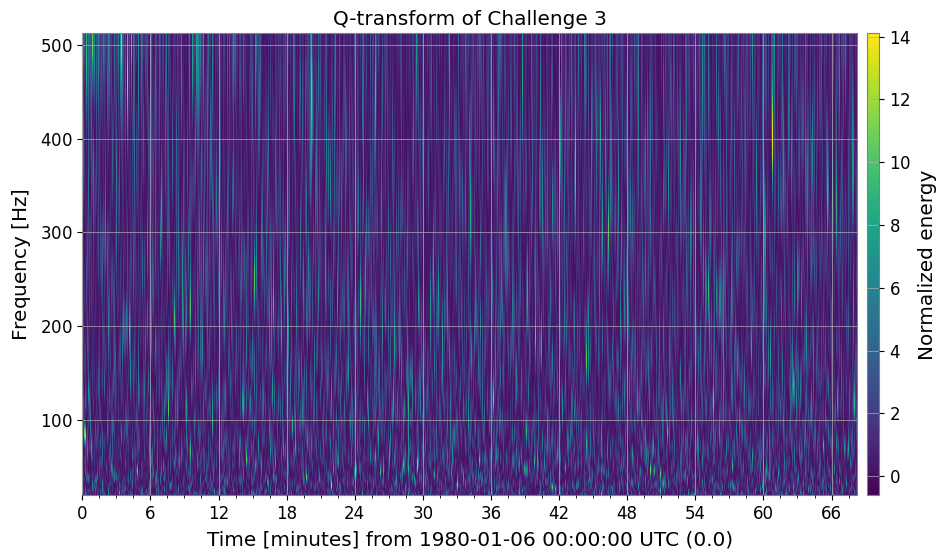

In [6]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

# Load strain data
strain = TimeSeries.read("/content/drive/MyDrive/Personal Files/Project/GW-ODW2025/challenge3.gwf", channel="H1:CHALLENGE3")

# Make Q-transform (spectrogram)
q = strain.q_transform(outseg=(strain.times.value[0], strain.times.value[-1]),
                       qrange=(8, 64), frange=(20, 512), logf=True)

# Plot Q-transform
plot = q.plot(figsize=(10, 6))
ax = plot.gca()
ax.set_title("Q-transform of Challenge 3")
ax.set_ylim(20, 512)
plot.colorbar(label="Normalized energy")
plot.show()

# Find merger time = time of max Q-transform energy
q_spect = q.value
time_axis = q.times.value
peak_time_index = np.unravel_index(np.argmax(q_spect), q_spect.shape)[1]
peak_time = time_axis[peak_time_index]

print(f"Estimated merger time: {peak_time:.4f} seconds from start of segment")


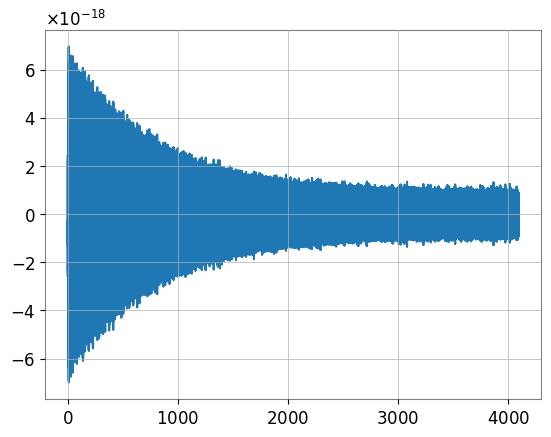

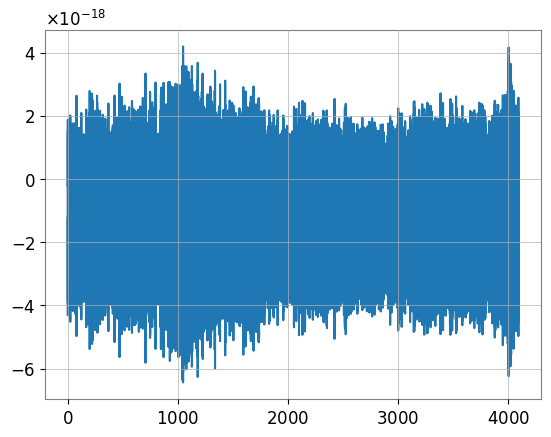

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries
from pycbc.waveform import get_td_waveform
from pycbc.filter import matched_filter
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.types import TimeSeries as PTimeSeries
from pycbc.detector import Detector

# Load and preprocess data
h1 = TimeSeries.read("/content/drive/MyDrive/Personal Files/Project/GW-ODW2025/challenge3.gwf", channel="H1:CHALLENGE3")
l1 = TimeSeries.read("/content/drive/MyDrive/Personal Files/Project/GW-ODW2025/challenge3.gwf", channel="L1:CHALLENGE3")

plt.plot(h1)
plt.show()

plt.plot(l1)
plt.show()

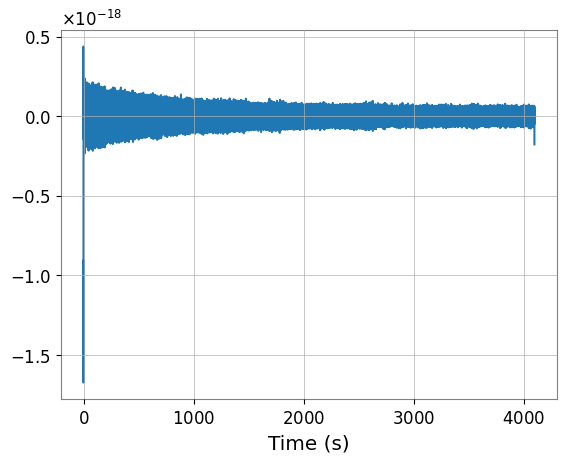

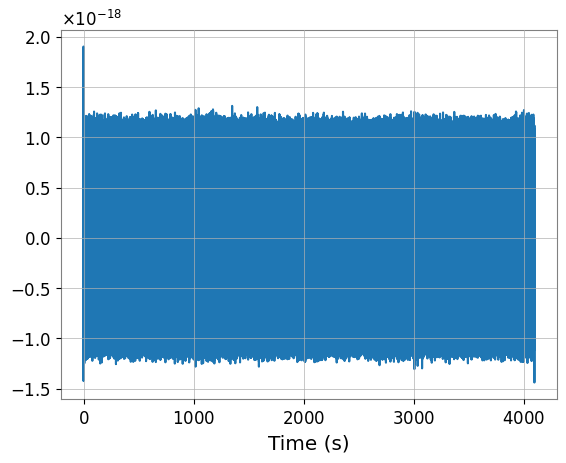

In [8]:
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.types import TimeSeries
import pylab

signal1 = np.array(h1)
signal2 = np.array(l1)

gw_timeseries1 = TimeSeries(signal1, delta_t=1/4096, epoch=0)


# Remove the low frequency content and downsample the data to 2048Hz
gw_timeseries1 = resample_to_delta_t(highpass(gw_timeseries1, 15.0), 1.0/2048)

pylab.plot(gw_timeseries1.sample_times, gw_timeseries1)
pylab.xlabel('Time (s)')
pylab.show()
gw_timeseries2 = TimeSeries(signal2, delta_t=1/4096, epoch=0)


# Remove the low frequency content and downsample the data to 2048Hz
gw_timeseries2 = resample_to_delta_t(highpass(gw_timeseries2, 15.0), 1.0/2048)

pylab.plot(gw_timeseries2.sample_times, gw_timeseries2)
pylab.xlabel('Time (s)')
pylab.show()

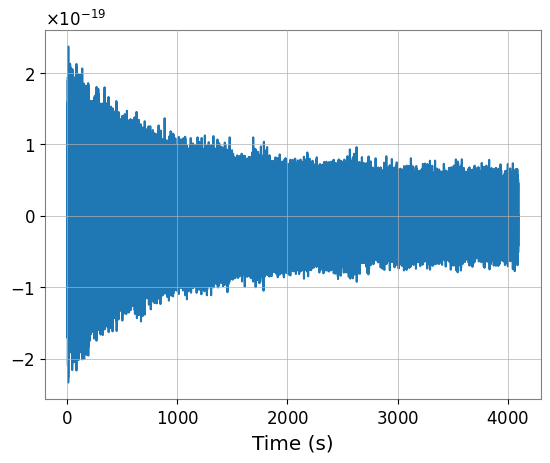

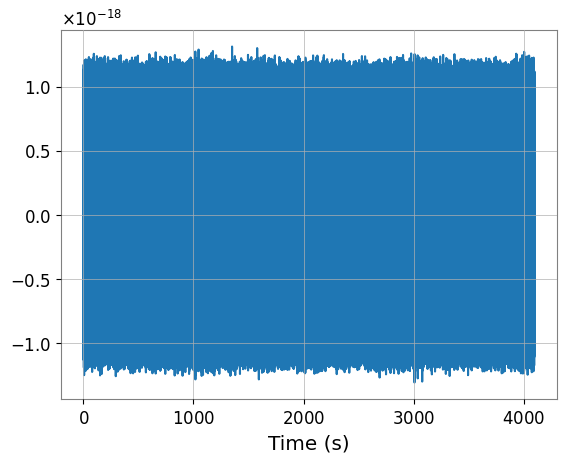

In [9]:
strain1=gw_timeseries1
conditioned1 = strain1.crop(2, 2)

pylab.plot(conditioned1.sample_times, conditioned1)
pylab.xlabel('Time (s)')
pylab.show()
strain2=gw_timeseries2
conditioned2 = strain2.crop(2, 2)

pylab.plot(conditioned2.sample_times, conditioned2)
pylab.xlabel('Time (s)')
pylab.show()

In [10]:
from pycbc.psd import interpolate, inverse_spectrum_truncation

psd1 = conditioned1.psd(4)
psd1 = interpolate(psd1, conditioned1.delta_f)
maxlen = int(4 * conditioned1.sample_rate)
psd1 = inverse_spectrum_truncation(psd1, max_filter_len=maxlen, low_frequency_cutoff=20)


psd2 = conditioned2.psd(4)
psd2 = interpolate(psd2, conditioned2.delta_f)
maxlen = int(4 * conditioned2.sample_rate)
psd2 = inverse_spectrum_truncation(psd2, max_filter_len=maxlen, low_frequency_cutoff=20)

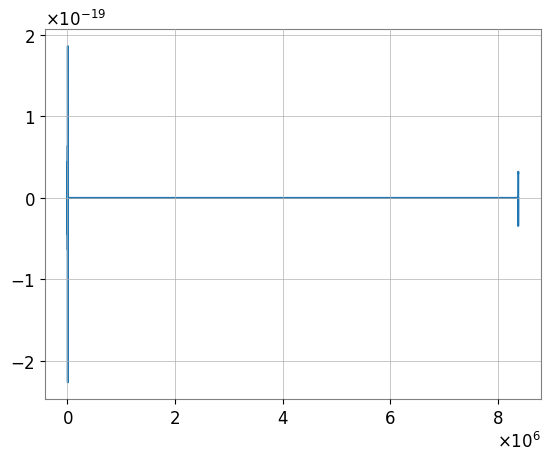

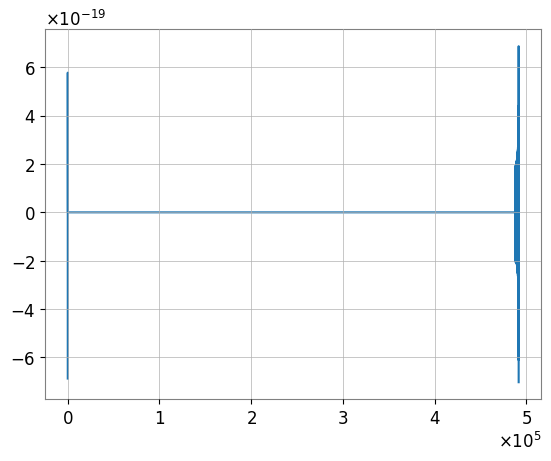

In [11]:
x=10
from pycbc.waveform import get_td_waveform
hp1, hc1 = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=x,
                     mass2=x,
                     delta_t=conditioned1.delta_t,
                     f_lower=20)

hp1.resize(len(conditioned1))

template1 = hp1.cyclic_time_shift(hp.start_time)
pylab.plot(template1)
pylab.show()
hp2, hc2 = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=x,
                     mass2=x,
                     delta_t=conditioned2.delta_t,
                     f_lower=20)

hp2.resize(len(conditioned2))

template2 = hp.cyclic_time_shift(hp.start_time)
pylab.plot(template2)
pylab.show()

In [12]:
massac=[]

for x in range(10,51):
  print('Mass m1 = m2 =', x)
  from pycbc.waveform import get_td_waveform
  hp1, hc1 = get_td_waveform(approximant="SEOBNRv4_opt",
                      mass1=x,
                      mass2=x,
                      delta_t=conditioned1.delta_t,
                      f_lower=20)

  # We will resize the vector to match our data
  hp1.resize(len(conditioned1))
  template1 = hp1.cyclic_time_shift(hp1.start_time)
  from pycbc.filter import matched_filter
  import numpy

  snr1 = matched_filter(template1, conditioned1,
                      psd=psd1, low_frequency_cutoff=20)


  snr1 = snr1.crop(4 + 4, 4)


  peak1 = abs(snr1).numpy().argmax()
  snrp1 = snr1[peak1]
  time1 = snr1.sample_times[peak1]

  print("Signal found at {}s with SNR {} in H1".format(round(time1, 3), round(abs(snrp1), 2)))
  hp2, hc2 = get_td_waveform(approximant="SEOBNRv4_opt",
                      mass1=x,
                      mass2=x,
                      delta_t=conditioned2.delta_t,
                      f_lower=20)

  # We will resize the vector to match our data
  hp2.resize(len(conditioned2))
  template2 = hp2.cyclic_time_shift(hp2.start_time)

  snr2 = matched_filter(template2, conditioned2,
                      psd=psd2, low_frequency_cutoff=20)


  snr2 = snr2.crop(4 + 4, 4)

  peak2 = abs(snr2).numpy().argmax()
  snrp2 = snr2[peak2]
  time2 = snr2.sample_times[peak2]

  print("Signal found at {}s with SNR {} in L1".format(round(time2, 3), round(abs(snrp2), 2)))

Mass m1 = m2 = 10
Signal found at 2483.967s with SNR 28.87 in H1
Signal found at 2483.968s with SNR 33.52 in L1
Mass m1 = m2 = 11
Signal found at 2892.714s with SNR 12.06 in H1
Signal found at 2892.717s with SNR 11.43 in L1
Mass m1 = m2 = 12
Signal found at 2892.712s with SNR 13.84 in H1
Signal found at 2892.717s with SNR 11.93 in L1
Mass m1 = m2 = 13
Signal found at 2892.712s with SNR 16.03 in H1
Signal found at 1638.17s with SNR 12.83 in L1
Mass m1 = m2 = 14
Signal found at 1638.158s with SNR 16.66 in H1
Signal found at 1638.167s with SNR 15.66 in L1
Mass m1 = m2 = 15
Signal found at 2892.711s with SNR 20.7 in H1
Signal found at 1638.158s with SNR 17.83 in L1
Mass m1 = m2 = 16
Signal found at 1638.158s with SNR 26.03 in H1
Signal found at 1638.158s with SNR 22.53 in L1
Mass m1 = m2 = 17
Signal found at 1638.157s with SNR 38.16 in H1
Signal found at 1638.156s with SNR 43.21 in L1
Mass m1 = m2 = 18
Signal found at 1638.155s with SNR 25.35 in H1
Signal found at 1638.155s with SNR 26.08 

In [13]:
# Identify glitches (loud in only one detector)
# (for simplicity, use SNR > 10 as glitch threshold if not coincident)
glitch_times = []

for det, ts in [("H1", h1), ("L1", l1)]:
    q = ts.q_transform(outseg=(ts.t0.value, ts.t0.value + ts.duration.value),
                       qrange=(8, 64))

    # Find the time-frequency index of the peak
    peak_idx = np.unravel_index(np.argmax(q.value), q.shape)
    time_of_peak = q.times.value[peak_idx[1]]
    freq_of_peak = q.frequencies.value[peak_idx[0]]
    peak_value = q.value[peak_idx]

    if peak_value > 30:  # threshold for glitch
        glitch_times.append((det, time_of_peak))
        print(f"Glitch detected in {det} at {time_of_peak:.2f}s (f ≈ {freq_of_peak:.1f} Hz)")

        # Plot spectrogram
        fig = q.plot()
        fig.colorbar(label='Normalized energy')
        fig.suptitle(f'Glitch in {det} at {time_of_peak:.2f}s')
        plt.close()


Glitch detected in H1 at 77.82s (f ≈ 3.6 Hz)
Glitch detected in L1 at 0.00s (f ≈ 499.6 Hz)
